# 우유 퀄리티를 예측해보자

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.api.types import CategoricalDtype

In [47]:
#train data : target은  Grade컬럼 
data = pd.read_csv('C:/deeplearning/머신러닝/milknew.csv')
print(data.shape)
data.head()

(1059, 8)


,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [48]:
data.describe()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


#### 변수 설명
- pH: 산도 (3~9.5, 낮을수록 강함)
- Temperatrue: 온도 (34도에서 90도)
- Taste: 맛 (0: 나쁘다, 1: 좋다)
- Odor: 냄새(0: 나쁘다, 1: 좋다)
- Fat: 지방 함량 (0: 낮다, 1: 높다)
- Turbidity: 혼탁도 (0: 탁하지 않다, 1: 탁하다)
- Colour: 색 (240에서 255 사이로 나타냄)   


- Grade: 점수 (타겟, high, medium, low 세 등급으로 분류)

### Grade(y) 숫자로 변환
- high -> 2
- medium -> 1
- low -> 0

In [49]:
data.loc[data['Grade']=='high', 'Grade'] = 2
data.loc[data['Grade']=='medium', 'Grade'] = 1
data.loc[data['Grade']=='low', 'Grade'] = 0
data

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,1
1055,6.7,38,1,0,1,0,255,2
1056,3.0,40,1,1,1,1,255,0
1057,6.8,43,1,0,1,0,250,2


#### Colour(색), grade(등급), Taste(맛), Odor(냄새), Fat(지방 함량), Turbidity(혼탁도) 카테고리형으로 변환

In [50]:
data['Colour'] = data['Colour'].astype('category')
data['Grade'] = data['Grade'].astype(CategoricalDtype(ordered=True))
data['Taste'] = data['Taste'].astype('category')
data['Odor'] = data['Odor'].astype('category')
data['Fat'] = data['Fat'].astype('category')
data['Turbidity'] = data['Turbidity'].astype('category')

- data를 8:2로 train, test를 나눔

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x = data[['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']]
y = data[['Grade']]

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y, random_state=34)

## 1. 데이터 점검
- 데이터 형태
- 결측치
- 몇 개의 데이터 있는지

In [54]:
data.dtypes # 형태

pH              float64
Temperature       int64
Taste          category
Odor           category
Fat            category
Turbidity      category
Colour         category
Grade          category
dtype: object

In [55]:
data.isna().sum() # 결측치

pH             0
Temperature    0
Taste          0
Odor           0
Fat            0
Turbidity      0
Colour         0
Grade          0
dtype: int64

In [56]:
x_train.shape

(847, 7)

In [57]:
x_test.shape

(212, 7)

- train 847개, test 212개 

In [58]:
data.skew()

pH            -0.683904
Temperature    2.216739
Taste         -0.188058
Odor           0.272949
Fat           -0.730799
Turbidity      0.035940
Colour        -1.024902
Grade          0.297174
dtype: float64

## 2. EDA train data

In [59]:
x_train

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour
968,8.1,66,1,0,1,1,255
836,3.0,40,1,1,1,1,255
615,3.0,40,1,0,0,0,255
208,8.1,66,1,0,1,1,255
949,6.5,35,1,0,1,0,246
...,...,...,...,...,...,...,...
594,9.5,34,1,1,0,1,255
635,6.5,38,1,0,0,0,255
332,6.5,37,0,0,0,0,255
382,9.0,43,1,0,1,1,250


#### 우유 퀄리티(y)는 어떤 등급이 가장 많을까?
- low > medium > high 순으로 많이 존재 
- 크게 치우치지 않음

In [60]:
print('high의 비율: ', round((y_train[y_train[['Grade']]== 2].count() / y_train[['Grade']].count())*100, 2))
print('medium의 비율: ', round((y_train[y_train[['Grade']]== 1].count() / y_train[['Grade']].count())*100, 2))
print('low의 비율: ', round((y_train[y_train[['Grade']]== 0].count() / y_train[['Grade']].count())*100, 2))

high의 비율:  Grade    24.2
dtype: float64
medium의 비율:  Grade    35.3
dtype: float64
low의 비율:  Grade    40.5
dtype: float64


In [61]:
train = pd.concat([x_train, y_train], axis = 1)
train

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
968,8.1,66,1,0,1,1,255,0
836,3.0,40,1,1,1,1,255,0
615,3.0,40,1,0,0,0,255,0
208,8.1,66,1,0,1,1,255,0
949,6.5,35,1,0,1,0,246,1
...,...,...,...,...,...,...,...,...
594,9.5,34,1,1,0,1,255,0
635,6.5,38,1,0,0,0,255,1
332,6.5,37,0,0,0,0,255,1
382,9.0,43,1,0,1,1,250,0


## 맛,  냄새, 지방 함량, 혼탁도

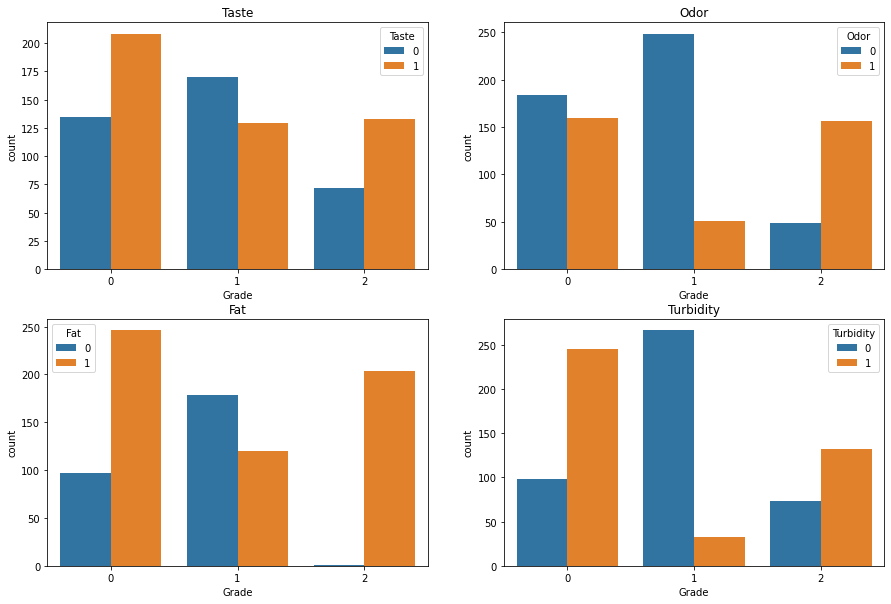

In [62]:
fig, axs = plt.subplots(2,2, figsize=(15, 10))
ax1, ax2, ax3, ax4 = axs.flatten()

axs1 = sns.countplot(x='Grade', hue = 'Taste', data=train, ax = ax1)
axs2 = sns.countplot(x='Grade', hue ='Odor', data=train, ax = ax2)
axs3 = sns.countplot(x='Grade', hue ='Fat', data=train, ax = ax3)
axs4 = sns.countplot(x='Grade', hue ='Turbidity', data=train, ax = ax4)

axs1.set_title('Taste')
axs2.set_title('Odor')
axs3.set_title('Fat')
axs4.set_title('Turbidity')

plt.show()

- 낮은 등급(low) 우유가 맛 평가에서 중간 등급(medium) 우유보다 더 많이 좋은 평가를 받았다  
    - 생각보다 우유 맛은 품질에 큰 영향을 주지 않는다  

- 2등급의 경우 모든 지표에서 좋은 평가 받음
- 1등급은 특히 냄새, 혼탁도에서 대부분 안좋은 평가 받음
- 0등급은 냄새 제외 대부분 좋은 평가 받음

## 위 지표들이 우유 등급을 가르는데 큰 영향을 끼치지 않을 것으로 예상 

## 온도, pH(산성도)

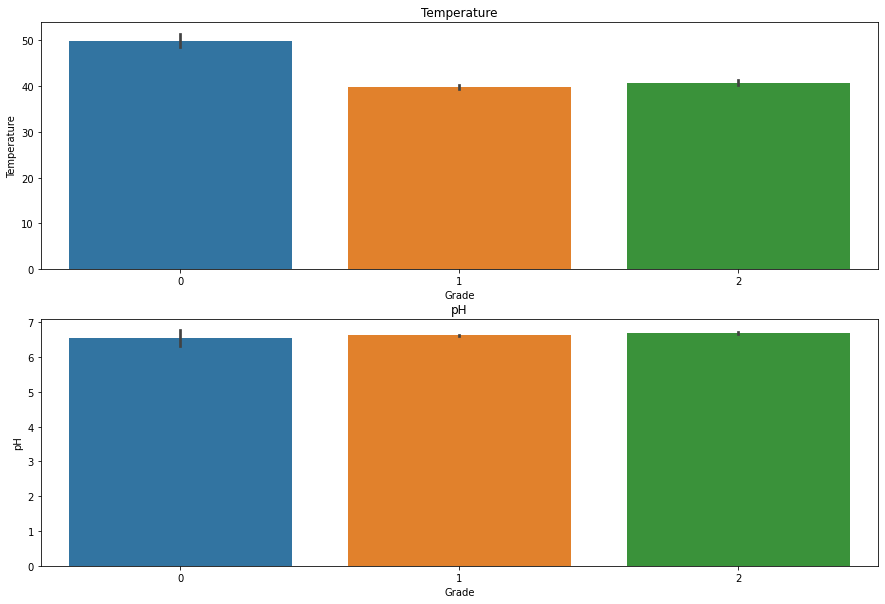

In [63]:
fig, axs = plt.subplots(2,1, figsize=(15, 10))
ax1, ax2 = axs.flatten()

axs1 = sns.barplot('Grade', 'Temperature', data=train, ax = ax1)
axs2 = sns.barplot('Grade', 'pH', data=train, ax = ax2)

axs1.set_title('Temperature')
axs2.set_title('pH')


plt.show()

## 산도, 온도, 색깔
- 등급별로 분포 확인

In [76]:
train0 = train[train['Grade'] == 0]
train1 = train[train['Grade'] == 1]
train2 = train[train['Grade'] == 2]

## 0등급

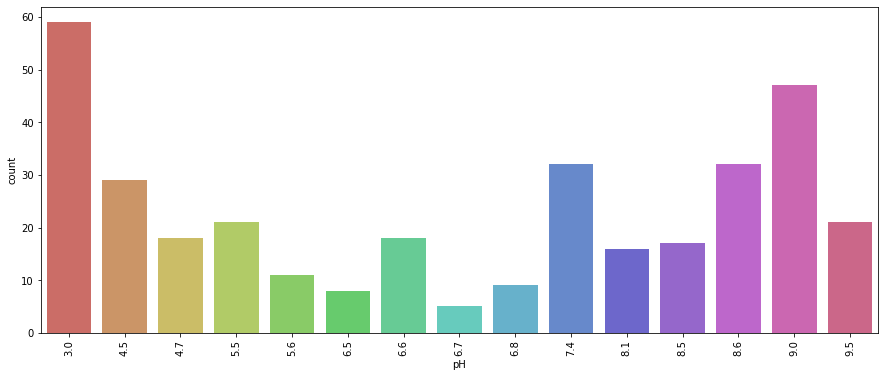

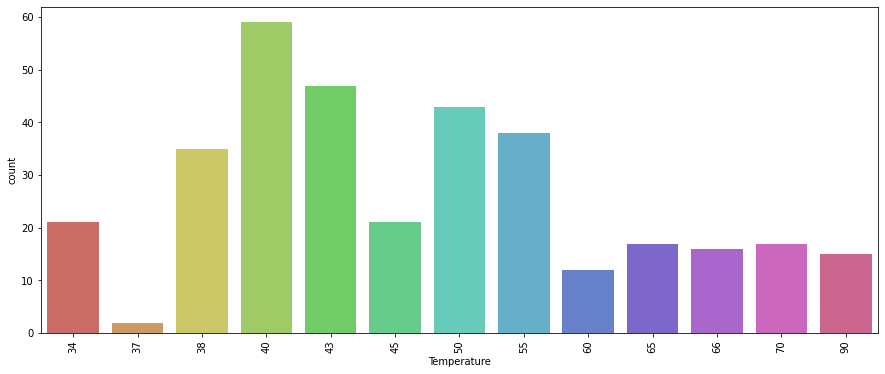

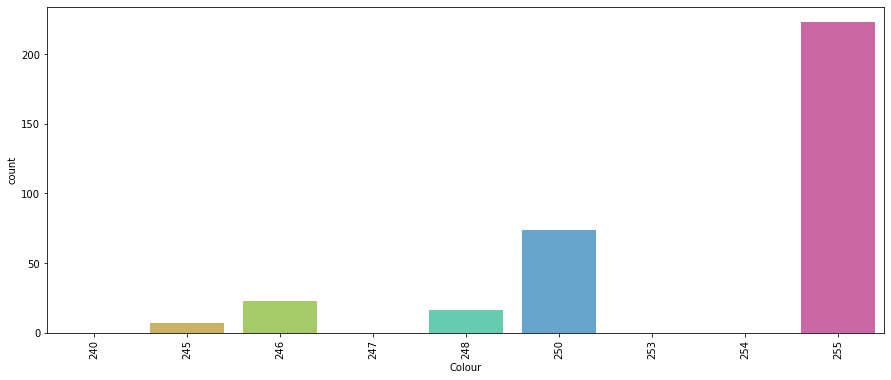

In [77]:
columns = ['pH', 'Temperature', 'Colour']
for i in columns:
  plt.figure(figsize=(15,6))
  sns.countplot(x = train0[i], data = train0, palette = 'hls') 
  plt.xticks(rotation = 90)
  plt.show()

## 1등급

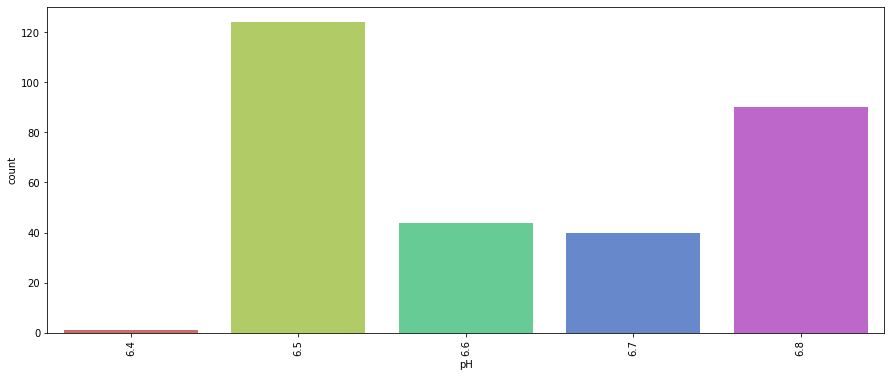

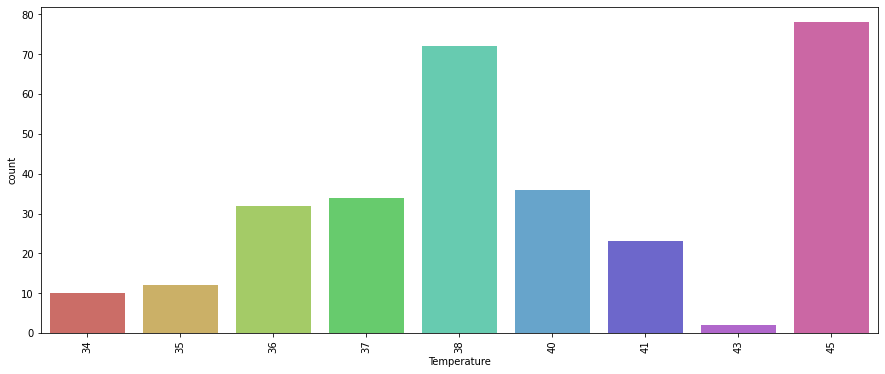

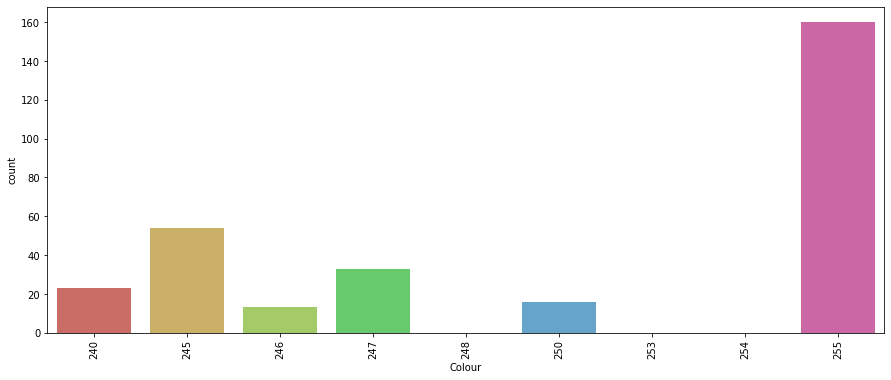

In [78]:
for i in columns:
  plt.figure(figsize=(15,6))
  sns.countplot(x = train1[i], data = train1, palette = 'hls') 
  plt.xticks(rotation = 90)
  plt.show()

## 2등급

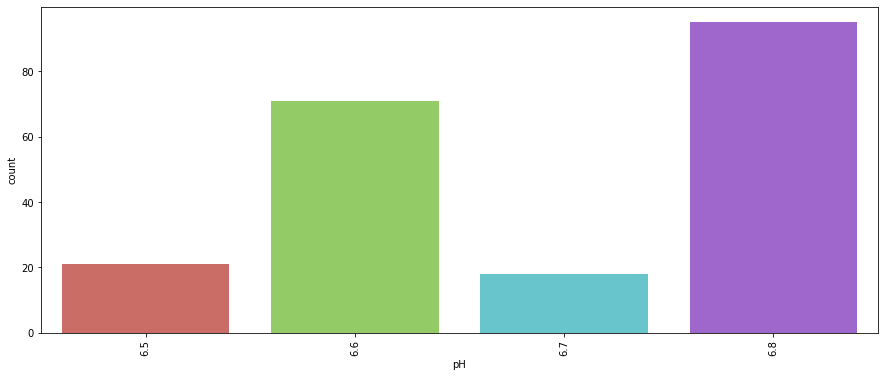

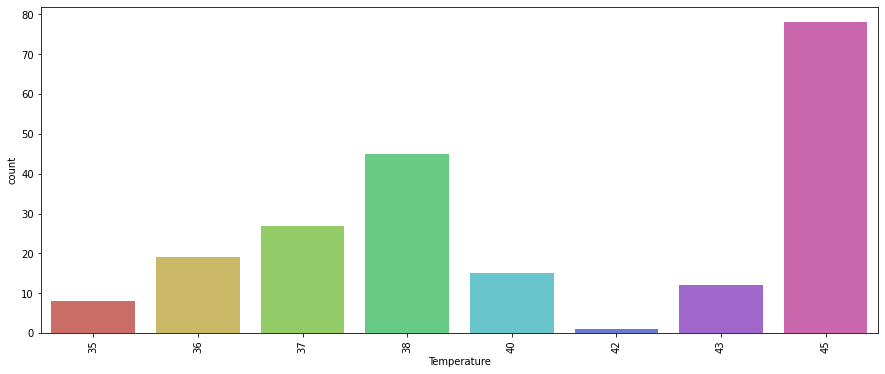

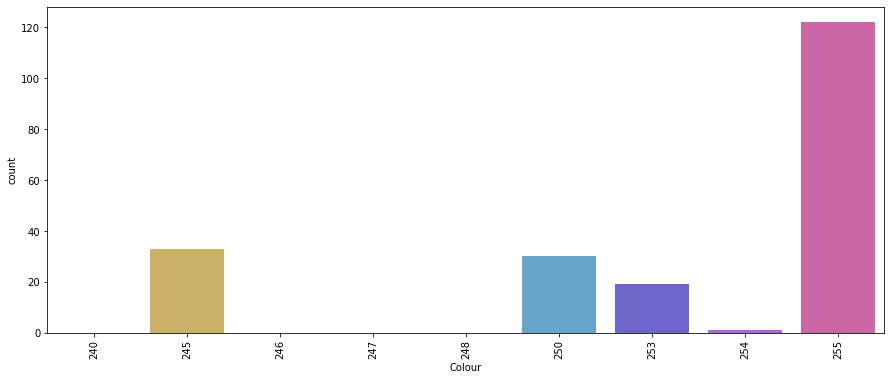

In [79]:
for i in columns:
  plt.figure(figsize=(15,6))
  sns.countplot( x = train2[i], data = train2, palette = 'hls') 
  plt.xticks(rotation = 90)
  plt.show()

- '산도가 너무 높거나 낮으면 좋은 평가를 받지 못한다'고 유추 가능
    - 0등급의 경우 산도가 3.0, 9.0에 많이 분포
- 온도 역시 45도 중간 정도에 위치해야 좋은 평가 받음
- 색깔은 세등급 모두 대부분 255

#### 산도, 온도가 우유 등급 판정에 큰 영향 끼칠 것으로 보임

## 3. 분류 모델  
- 랜덤 포레스트

In [219]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [220]:
model.fit(x_train,y_train)

<ipython-input-220-4719cf73997a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestClassifier()

In [221]:
model.score(x_train,y_train)

1.0

In [222]:
model.score(x_test,y_test)

0.9952830188679245

In [223]:
importances = model.feature_importances_
importances

array([0.40490728, 0.22932482, 0.0427615 , 0.07958708, 0.08553297,
       0.09293536, 0.06495099])

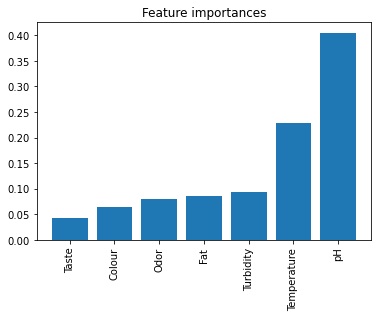

In [225]:
import numpy as np
import matplotlib.pyplot as plt
indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), x_train.columns[indices_sorted], rotation=90)
plt.show()

- 예상대로 pH, 온도가 우유 등급 결정에 큰 영향을 끼침

## 위의 결과도 매우 높기 때문에 굳이 튜닝할 필요는 없음
예시

In [110]:
from sklearn.model_selection import GridSearchCV

params ={
    'n_estimators':[100],
    'max_depth':[3, 5, 7],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

In [113]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
grid_cv = GridSearchCV(model, param_grid=params, cv=2)
grid_cv.fit(x_train,y_train)

C:\Users\jaeb0\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jaeb0\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jaeb0\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jaeb0\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\jaeb0\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jaeb0\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jaeb0\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jaeb0\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

In [116]:
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9752


In [119]:
from sklearn.metrics import accuracy_score
model2 = RandomForestClassifier(n_estimators = 100,
                               max_depth = 7,
                               min_samples_leaf = 8,
                               min_samples_split = 8,
                               random_state= 0)
model2.fit(x_train, y_train)
pred = model2.predict(x_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9953


<ipython-input-119-9adf968cf3d7>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(x_train, y_train)


Parameter (Python의 sklearn 라이브러리 기준)

- N-estimator : 랜덤포레스트 안에 만들어지는 의사결정나무 갯수. 트리가 많아지면 속도가 느려지고 너무 트리가 크면 오히려 정확도가 낮아진다. 그러나 일반적으론 트리가 많아질수록 분류를 잘하게 되므로 적절한 trade-off 필요하다.


- Max-depth : 랜덤포레스트 안에 있는 각 의사결정나무의 깊이를 설정. 트리가 깊어질수록 더 잘게 분류를 시키므로 일반적으론 정확도가 높아진다.


- Min-samples-split : 노드를 분할하기 위한 최소한의 샘플 데이터수 → 과적합을 제어하는데 사용  
Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가


- Min-samples-leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수  
min_samples_split과 함께 과적합 제어 용도  
불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요


- Max-feature : 가장 잘 분류할 feature의 갯수를 설정. 



## knn
- 지도 학습, 이웃은 3개(홀수로 해야!, 짝수는 동점이 나오기 때문)
- 거리기반 모델이기에 표준화가 필요
- ex) 변수A 1-10, 변수B 1-1,000,000
- 이렇게 분포가 다르면 각 변수의 차이 해석하기가 어려움
- 분포A가 분포B보다 범위가 크므로 훨씬 더 많은 영향 미침

In [99]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3) # 디폴트 5

In [100]:
for_knn = pd.read_csv('C:/deeplearning/머신러닝/milknew.csv')

x_knn = for_knn[['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']]
y_knn = for_knn[['Grade']]
x_knn_train, x_knn_test, y_knn_train, y_knn_test = train_test_split(x_knn, y_knn, test_size=0.2, shuffle=True, stratify=y, random_state=34)

In [101]:
train_stan = (x_knn_train - x_knn_train.mean())/x_knn_train.std()
test_stan = (x_knn_test - x_knn_test.mean())/x_knn_test.std()

In [102]:
model.fit(train_stan,y_train)

C:\Users\jaeb0\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [103]:
model.score(train_stan,y_train)*100

100.0

In [104]:
model.score(test_stan,y_test)*100

97.64150943396226

In [106]:
y_pred = model.predict(test_stan)

In [109]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        86
           1       0.94      1.00      0.97        75
           2       1.00      0.92      0.96        51

    accuracy                           0.98       212
   macro avg       0.98      0.97      0.97       212
weighted avg       0.98      0.98      0.98       212

Confusion Matrix:
[[85  1  0]
 [ 0 75  0]
 [ 0  4 47]]


## k-means
- 기존 정답으로 분류가 아닌 새롭게 분류해보자! 3개의 그룹으로!
- 비지도 학습

In [85]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=123)

In [86]:
model.fit(train)
train['label'] = model.predict(train)
train

C:\Users\jaeb0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jaeb0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade,label
968,8.1,66,1,0,1,1,255,0,1
836,3.0,40,1,1,1,1,255,0,2
615,3.0,40,1,0,0,0,255,0,2
208,8.1,66,1,0,1,1,255,0,1
949,6.5,35,1,0,1,0,246,1,2
...,...,...,...,...,...,...,...,...,...
594,9.5,34,1,1,0,1,255,0,2
635,6.5,38,1,0,0,0,255,1,2
332,6.5,37,0,0,0,0,255,1,2
382,9.0,43,1,0,1,1,250,0,0


In [87]:
train['label'].value_counts()

2    398
0    372
1     77
Name: label, dtype: int64